<a href="https://colab.research.google.com/github/srirampattabiraman/Extensive-NLP-and-Deep-Learning/blob/main/pytorch_101/Session_3_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [2]:
##Calling all Gods
import math
import numpy as np
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models,transforms
import matplotlib.pyplot as plt

from tqdm import tqdm
from torchsummary import summary

Downloading The MNIST data


In [3]:
# Train transformations
train_transforms = transforms.Compose([ transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       ])

# Test transformations
test_transforms = transforms.Compose([ transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [4]:
##Getting Mnist Dataset

train_data = datasets.MNIST('/home/jd/Desktop/DATASET/data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('/home/jd/Desktop/DATASET/data', train=False, download=True, transform=test_transforms)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /home/jd/Desktop/DATASET/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/jd/Desktop/DATASET/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /home/jd/Desktop/DATASET/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/jd/Desktop/DATASET/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /home/jd/Desktop/DATASET/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/jd/Desktop/DATASET/data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /home/jd/Desktop/DATASET/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/jd/Desktop/DATASET/data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


##Batching and Shuffling the Dataset (For Practice)

In [5]:
#iter function makes the sequence iterable so that we can ask its next sequence
next(iter(train_data))[1]

5

In [6]:
cuda = torch.cuda.is_available()

In [28]:
##Using DataLoader
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = DataLoader(train_data, **dataloader_args)
test_loader = DataLoader(test_data, **dataloader_args)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [8]:
##Checking the length after converting into Batch
print("Length of each sequence is:", len(next(iter(train_loader))))
print("Total No of classes in each sequence:", len(next(iter(train_loader))[1]))
print("printing class names in batch-->:", next(iter(train_loader))[1])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Length of each sequence is: 2
Total No of classes in each sequence: 128
printing class names in batch-->: tensor([3, 1, 3, 4, 2, 1, 5, 3, 9, 5, 8, 8, 3, 5, 4, 9, 5, 5, 0, 3, 6, 6, 4, 3,
        3, 5, 7, 1, 7, 6, 1, 4, 2, 6, 8, 8, 9, 5, 4, 3, 8, 2, 9, 8, 4, 2, 2, 0,
        9, 1, 0, 8, 6, 6, 0, 6, 2, 0, 3, 7, 1, 1, 3, 5, 9, 7, 4, 1, 5, 0, 0, 4,
        3, 7, 9, 2, 9, 9, 9, 6, 4, 7, 1, 7, 3, 7, 5, 9, 7, 7, 9, 5, 5, 7, 9, 9,
        3, 5, 1, 0, 0, 0, 6, 3, 8, 3, 7, 0, 6, 9, 8, 3, 6, 5, 7, 2, 7, 1, 0, 0,
        0, 9, 9, 8, 4, 0, 2, 9])


In [9]:
##Getting the frequency of each class
train_data.train_labels.bincount()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

Data is consistent and balanced

Taking a image sample to visualize

In [10]:
sample = next(iter(train_data))

In [11]:
image_1, label = sample

label: 5


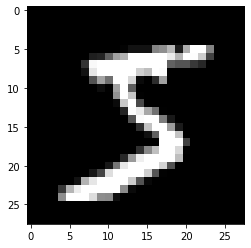

In [12]:
plt.imshow(image_1.squeeze(), cmap='gray')
print("label:", label)

In [13]:
## Checking batch shape
batch = next(iter(train_loader))

images, labels = batch
images.shape, labels.shape

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [14]:
def generate_data(data_t, MNIST, N):
    X = torch.randint(low=0, high=10, size=(N,))
    
    if data_t == 'train':
        image = train_data.train_data
        labels = train_data.train_labels
    elif data_t == 'test':
        image = test_data.test_data
        labels = test_data.test_labels
    else:
        print ('Input the Type')
        
    return image,labels,X,X+labels

In [15]:
class MNIST_Random_loader(Dataset,):

    def __init__(self,Image,Image_lables, X,transform=None):

        self.image = Image.float()
        self.image_labels = Image_lables
        self.Y = X + self.image_labels
        self.Y = F.one_hot(self.Y,num_classes =19 )
        self.X = F.one_hot(X,num_classes = 10)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_labels)

    def __getitem__(self, idx):
        
        if self.transform:
            self.image = self.transform(self.image)
            
#         return self.image, self.image_labels, self.X,self.Y
            
        return self.image[idx,:].reshape(1,28,28), self.image_labels[idx], self.X[idx,:], self.Y[idx,:]

In [16]:
train_images,train_labels,train_random_num,train_labels2 = generate_data('train',train_data,train_data.train_labels.shape[0])
test_images,test_labels,test_random_num,test_labels2 = generate_data('test',test_data,test_data.test_labels.shape[0])

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [17]:
train_data = MNIST_Random_loader(train_images,train_labels,train_random_num)
test_data = MNIST_Random_loader(test_images,test_labels,test_random_num)

Making MNIST CNN Model

In [18]:
class MnistNetwork(nn.Module):
  def __init__(self):
        super(MnistNetwork, self).__init__()
        dropout_value = 0.01
        
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        )

        
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        ) 
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=15, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(15),
            nn.ReLU(),
        ) 

        
        self.pool1 = nn.MaxPool2d(2, 2) 
        
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=15, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        ) 

        
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        ) 
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        ) 
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Dropout(dropout_value)
        ) 
        # OUTPUT BLOCK
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(5, 5), padding=0, bias=False)
        ) 
        

  def forward(self, x):
#         print (x.shape)
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        out = F.log_softmax(x, dim=-1)
        return x,out
    
  def backward(self, retain_variables=True):
        #retain_variables True??
        self.loss.backward(retain_variables=retain_variables)
        return self.loss

In [19]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = MnistNetwork().to(device)
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 15, 22, 22]           1,350
      BatchNorm2d-10           [-1, 15, 22, 22]              30
             ReLU-11           [-1, 15, 22, 22]               0
        MaxPool2d-12           [-1, 15, 11, 11]               0
           Conv2d-13           [-1, 10, 11, 11]             150
      BatchNorm2d-14           [-1, 10,

In [20]:
model1 = MnistNetwork().to(device)

Stacking MNIST with new model to add

In [21]:
class MNIST_adder(nn.Module):
    def __init__(self):
        super(MNIST_adder,self).__init__()
        dropout_value = 0.01
        self.mnist_mode = MnistNetwork().to('cuda')
        
        self.layer1 = nn.Sequential(nn.Linear(in_features=20,out_features=32),
                            nn.BatchNorm1d(32),
                            nn.ReLU(),
                            nn.Dropout(dropout_value)
                                   )

        self.layer2 = nn.Sequential(nn.Linear(in_features=32,out_features=64),
                            nn.BatchNorm1d(64),
                            nn.ReLU(),
                            nn.Dropout(dropout_value)
                                   )

        self.layer3 = nn.Sequential(nn.Linear(in_features=64,out_features=128),
                            nn.BatchNorm1d(128),
                            nn.ReLU(),
                            nn.Dropout(dropout_value)
                                   )

        self.model2_out = nn.Linear(in_features=128,out_features=19)
  
        
    def forward(self,mnist_img,Num ):
        
        mnist_d,pred_image = self.mnist_mode(mnist_img)  
        mnist_number = torch.cat([mnist_d,Num],dim  = -1)  # concatenation 
        
        x = self.layer1(mnist_number)
        x = self.layer2(x)
        x = self.layer3(x)
        out2 = self.model2_out(x)
        return pred_image,out2

In [22]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(f'Model can run on CUDA {device}')

model2 = MNIST_adder().to(device)

Model can run on CUDA cuda


In [23]:
train_losses_image = []
train_losses_random = []

test_losses_image = []
test_losses_random = []

train_acc = []
test_acc = []

Accuracy Calculation

In [24]:
def accuracy(model, ds):
    # assumes model.eval()
    n_correct = 0; n_wrong = 0
    # using loader avoids resize() issues
    ldr = DataLoader(ds, batch_size=1,shuffle=False)
    for _, (data1,target1,data2,target2) in enumerate(ldr):
        data,target = data.to('cuda'),target.to('cuda')
        X = data
        Y = target
        with torch.no_grad():
            y_pred1,y_pred2 = model(data1,data2)  # probs form    
        if torch.argmax(Y) == torch.argmax(oupt):
            n_correct += 1
        else:
            n_wrong += 1
    acc = (n_correct * 1.0) / (n_correct + n_wrong)
    return acc

Loss Function

In [25]:
def total_loss(y_pred1, target1,y_pred2, target2):
    loss_fun = nn.CrossEntropyLoss()
    loss1,loss2 = F.nll_loss(y_pred1, target1), loss_fun(y_pred2,target2)
    return loss1,loss2

In [26]:
def train(model, device, train_loader, optimizer, epoch,train_data):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    second_correct = 0
    for batch_idx, (data1,target1,data2,target2) in enumerate(pbar):
        # get samples
        data1, target1 = data1.to(device), target1.to(device)
        data2, target2 = data2.to(device), target2.to(device)
        # Init
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
        # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

        # Predict
        y_pred1,y_pred2 = model(data1,data2)

        # Calculate loss
        loss1,loss2 = total_loss(y_pred1, target1,y_pred2, target2.argmax(dim = 1))
        loss = loss1+loss2
        train_losses_image.append(loss1)
        train_losses_random.append(loss2)
 
        # Backpropagation
#         loss1.backward(retain_graph=True)
#         loss2.backward()
        loss.backward()
        optimizer.step()

        # Update pbar-tqdm

        pred = y_pred1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target1.view_as(pred)).sum().item()
        processed += len(data1)
        
        second_correct += y_pred2.argmax(dim =1).eq(target2.argmax(dim = 1)).sum().item()
        
        pbar.set_description(desc= f' Loss1={loss1.item() } and loss2 {loss2.item()} Batch_id={batch_idx} Accuracy1={100*correct/processed:0.2f},Accuracy2={100*second_correct/processed:0.2f}')
        train_acc.append(100*correct/processed)

Model Train

In [29]:
model2 =  MNIST_adder().to(device)
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 25

device = 'cuda'
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    # print(train_loader)

    train(model2, device, train_loader, optimizer, epoch,train_data)


  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

 Loss1=2.3841681480407715 and loss2 3.0801680088043213 Batch_id=0 Accuracy1=11.72,Accuracy2=3.12:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=2.3841681480407715 and loss2 3.0801680088043213 Batch_id=0 Accuracy1=11.72,Accuracy2=3.12:   0%|          | 1/469 [00:00<01:57,  3.99it/s]
 Loss1=2.365262031555176 and loss2 3.0989573001861572 Batch_id=1 Accuracy1=9.38,Accuracy2=3.91:   0%|          | 1/469 [00:00<01:57,  3.99it/s]  
 Loss1=2.3899550437927246 and loss2 3.0632317066192627 Batch_id=2 Accuracy1=10.42,Accuracy2=4.43:   0%|          

EPOCH: 1



 Loss1=0.10712850093841553 and loss2 0.1927676945924759 Batch_id=0 Accuracy1=96.88,Accuracy2=94.53:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.10712850093841553 and loss2 0.1927676945924759 Batch_id=0 Accuracy1=96.88,Accuracy2=94.53:   0%|          | 1/469 [00:00<01:26,  5.40it/s]
 Loss1=0.0599479079246521 and loss2 0.15212015807628632 Batch_id=1 Accuracy1=98.05,Accuracy2=96.09:   0%|          | 1/469 [00:00<01:26,  5.40it/s]
 Loss1=0.06889239698648453 and loss2 0.22112372517585754 Batch_id=2 Accuracy1=97.92,Accuracy2=95.31:   0%|          | 1/469 [00:00<01:26,  5.40it/s]
 Loss1=0.09531029313802719 and loss2 0.17785707116127014 Batch_id=3 Accuracy1=98.05,Accuracy2=95.51:   0%|          | 1/469 [00:00<01:26,  5.40it/s]
 Loss1=0.0678175538778305 and loss2 0.16569943726062775 Batch_id=4 Accuracy1=98.28,Accuracy2=95.62:   0%|          | 1/469 [00:00<01:26,  5.40it/s] 
 Loss1=0.0678175538778305 and loss2 0.16569943726062775 Batch_id=4 Accuracy1=98.28,Accuracy2=95.62:   1%|          |

EPOCH: 2



 Loss1=0.11420172452926636 and loss2 0.12362890690565109 Batch_id=0 Accuracy1=96.88,Accuracy2=95.31:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.11420172452926636 and loss2 0.12362890690565109 Batch_id=0 Accuracy1=96.88,Accuracy2=95.31:   0%|          | 1/469 [00:00<02:09,  3.60it/s]
 Loss1=0.09027516096830368 and loss2 0.13873998820781708 Batch_id=1 Accuracy1=96.88,Accuracy2=95.70:   0%|          | 1/469 [00:00<02:09,  3.60it/s]
 Loss1=0.05429787188768387 and loss2 0.08376459777355194 Batch_id=2 Accuracy1=97.14,Accuracy2=96.35:   0%|          | 1/469 [00:00<02:09,  3.60it/s]
 Loss1=0.05001983046531677 and loss2 0.09715349972248077 Batch_id=3 Accuracy1=97.46,Accuracy2=96.48:   0%|          | 1/469 [00:00<02:09,  3.60it/s]
 Loss1=0.0424455963075161 and loss2 0.07996103167533875 Batch_id=4 Accuracy1=97.81,Accuracy2=96.88:   0%|          | 1/469 [00:00<02:09,  3.60it/s] 
 Loss1=0.0424455963075161 and loss2 0.07996103167533875 Batch_id=4 Accuracy1=97.81,Accuracy2=96.88:   1%|        

EPOCH: 3



 Loss1=0.06874531507492065 and loss2 0.14941632747650146 Batch_id=0 Accuracy1=98.44,Accuracy2=96.09:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.06874531507492065 and loss2 0.14941632747650146 Batch_id=0 Accuracy1=98.44,Accuracy2=96.09:   0%|          | 1/469 [00:00<01:51,  4.20it/s]
 Loss1=0.029225168749690056 and loss2 0.09666953980922699 Batch_id=1 Accuracy1=99.22,Accuracy2=96.88:   0%|          | 1/469 [00:00<01:51,  4.20it/s]
 Loss1=0.042883940041065216 and loss2 0.06484082341194153 Batch_id=2 Accuracy1=99.48,Accuracy2=97.40:   0%|          | 1/469 [00:00<01:51,  4.20it/s]
 Loss1=0.09072510898113251 and loss2 0.10945376008749008 Batch_id=3 Accuracy1=98.63,Accuracy2=97.07:   0%|          | 1/469 [00:00<01:51,  4.20it/s] 
 Loss1=0.05168282240629196 and loss2 0.10014448314905167 Batch_id=4 Accuracy1=98.59,Accuracy2=96.88:   0%|          | 1/469 [00:00<01:51,  4.20it/s]
 Loss1=0.05168282240629196 and loss2 0.10014448314905167 Batch_id=4 Accuracy1=98.59,Accuracy2=96.88:   1%|    

EPOCH: 4



 Loss1=0.03470693528652191 and loss2 0.04631262272596359 Batch_id=0 Accuracy1=98.44,Accuracy2=98.44:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.03470693528652191 and loss2 0.04631262272596359 Batch_id=0 Accuracy1=98.44,Accuracy2=98.44:   0%|          | 1/469 [00:00<01:52,  4.14it/s]
 Loss1=0.09851478785276413 and loss2 0.14200077950954437 Batch_id=1 Accuracy1=97.66,Accuracy2=97.66:   0%|          | 1/469 [00:00<01:52,  4.14it/s]
 Loss1=0.019145512953400612 and loss2 0.03223210200667381 Batch_id=2 Accuracy1=98.44,Accuracy2=97.92:   0%|          | 1/469 [00:00<01:52,  4.14it/s]
 Loss1=0.019145512953400612 and loss2 0.03223210200667381 Batch_id=2 Accuracy1=98.44,Accuracy2=97.92:   1%|          | 3/469 [00:00<01:26,  5.41it/s]
 Loss1=0.03930585831403732 and loss2 0.059274960309267044 Batch_id=3 Accuracy1=98.63,Accuracy2=98.24:   1%|          | 3/469 [00:00<01:26,  5.41it/s]
 Loss1=0.010177713818848133 and loss2 0.04227728396654129 Batch_id=4 Accuracy1=98.91,Accuracy2=98.44:   1%|   

EPOCH: 5



 Loss1=0.021338749676942825 and loss2 0.03781576827168465 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.021338749676942825 and loss2 0.03781576827168465 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:02,  3.81it/s]
 Loss1=0.023870401084423065 and loss2 0.06333690881729126 Batch_id=1 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:02,  3.81it/s] 
 Loss1=0.02516699954867363 and loss2 0.053158726543188095 Batch_id=2 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:02,  3.81it/s]
 Loss1=0.018984299153089523 and loss2 0.0732017308473587 Batch_id=3 Accuracy1=100.00,Accuracy2=98.83:   0%|          | 1/469 [00:00<02:02,  3.81it/s] 
 Loss1=0.08482152968645096 and loss2 0.15724939107894897 Batch_id=4 Accuracy1=99.69,Accuracy2=98.59:   0%|          | 1/469 [00:00<02:02,  3.81it/s] 
 Loss1=0.08482152968645096 and loss2 0.15724939107894897 Batch_id=4 Accuracy1=99.69,Accuracy2=98.59

EPOCH: 6



 Loss1=0.04724820703268051 and loss2 0.08308260887861252 Batch_id=0 Accuracy1=98.44,Accuracy2=97.66:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.04724820703268051 and loss2 0.08308260887861252 Batch_id=0 Accuracy1=98.44,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:11,  3.56it/s]
 Loss1=0.01599394716322422 and loss2 0.020232360810041428 Batch_id=1 Accuracy1=99.22,Accuracy2=98.83:   0%|          | 1/469 [00:00<02:11,  3.56it/s]
 Loss1=0.03236757963895798 and loss2 0.12430402636528015 Batch_id=2 Accuracy1=99.48,Accuracy2=98.18:   0%|          | 1/469 [00:00<02:11,  3.56it/s] 
 Loss1=0.017154332250356674 and loss2 0.0407881885766983 Batch_id=3 Accuracy1=99.61,Accuracy2=98.24:   0%|          | 1/469 [00:00<02:11,  3.56it/s]
 Loss1=0.04239948093891144 and loss2 0.04711046442389488 Batch_id=4 Accuracy1=99.53,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:11,  3.56it/s]
 Loss1=0.04239948093891144 and loss2 0.04711046442389488 Batch_id=4 Accuracy1=99.53,Accuracy2=98.44:   1%|     

EPOCH: 7



 Loss1=0.025717955082654953 and loss2 0.051431797444820404 Batch_id=0 Accuracy1=99.22,Accuracy2=97.66:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.025717955082654953 and loss2 0.051431797444820404 Batch_id=0 Accuracy1=99.22,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:05,  3.74it/s]
 Loss1=0.01880173198878765 and loss2 0.08718761801719666 Batch_id=1 Accuracy1=99.61,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:05,  3.74it/s]  
 Loss1=0.026525042951107025 and loss2 0.02823599800467491 Batch_id=2 Accuracy1=99.48,Accuracy2=97.92:   0%|          | 1/469 [00:00<02:05,  3.74it/s]
 Loss1=0.03828266263008118 and loss2 0.05283448472619057 Batch_id=3 Accuracy1=99.41,Accuracy2=97.85:   0%|          | 1/469 [00:00<02:05,  3.74it/s] 
 Loss1=0.03828266263008118 and loss2 0.05283448472619057 Batch_id=3 Accuracy1=99.41,Accuracy2=97.85:   1%|          | 4/469 [00:00<01:32,  5.03it/s]
 Loss1=0.028790436685085297 and loss2 0.05439234524965286 Batch_id=4 Accuracy1=99.38,Accuracy2=97.97:   1

EPOCH: 8



 Loss1=0.015469305217266083 and loss2 0.01465244684368372 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.015469305217266083 and loss2 0.01465244684368372 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:06,  3.69it/s]
 Loss1=0.030747078359127045 and loss2 0.05220705643296242 Batch_id=1 Accuracy1=99.61,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:06,  3.69it/s]  
 Loss1=0.025308456271886826 and loss2 0.04013980180025101 Batch_id=2 Accuracy1=99.48,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:06,  3.69it/s]
 Loss1=0.025308456271886826 and loss2 0.04013980180025101 Batch_id=2 Accuracy1=99.48,Accuracy2=99.22:   1%|          | 3/469 [00:00<01:35,  4.89it/s]
 Loss1=0.017211247235536575 and loss2 0.027713239192962646 Batch_id=3 Accuracy1=99.61,Accuracy2=99.41:   1%|          | 3/469 [00:00<01:35,  4.89it/s]
 Loss1=0.05647790804505348 and loss2 0.07999846339225769 Batch_id=4 Accuracy1=99.53,Accuracy2=99.06:

EPOCH: 9



 Loss1=0.0189531110227108 and loss2 0.07253076881170273 Batch_id=0 Accuracy1=100.00,Accuracy2=98.44:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.0189531110227108 and loss2 0.07253076881170273 Batch_id=0 Accuracy1=100.00,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:10,  3.59it/s]
 Loss1=0.01524145808070898 and loss2 0.01784628815948963 Batch_id=1 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:10,  3.59it/s]
 Loss1=0.03480686992406845 and loss2 0.044908881187438965 Batch_id=2 Accuracy1=99.74,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:10,  3.59it/s]
 Loss1=0.011599305085837841 and loss2 0.02179645001888275 Batch_id=3 Accuracy1=99.80,Accuracy2=99.41:   0%|          | 1/469 [00:00<02:10,  3.59it/s]
 Loss1=0.025576315820217133 and loss2 0.02513868361711502 Batch_id=4 Accuracy1=99.84,Accuracy2=99.38:   0%|          | 1/469 [00:00<02:10,  3.59it/s]
 Loss1=0.025576315820217133 and loss2 0.02513868361711502 Batch_id=4 Accuracy1=99.84,Accuracy2=99.38:   1%|  

EPOCH: 10



 Loss1=0.008668343536555767 and loss2 0.009319784119725227 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.008668343536555767 and loss2 0.009319784119725227 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<04:56,  1.58it/s]
 Loss1=0.04185410961508751 and loss2 0.05644859001040459 Batch_id=1 Accuracy1=99.61,Accuracy2=99.61:   0%|          | 1/469 [00:00<04:56,  1.58it/s]    
 Loss1=0.007178491447120905 and loss2 0.015159680508077145 Batch_id=2 Accuracy1=99.74,Accuracy2=99.74:   0%|          | 1/469 [00:00<04:56,  1.58it/s]
 Loss1=0.007178491447120905 and loss2 0.015159680508077145 Batch_id=2 Accuracy1=99.74,Accuracy2=99.74:   1%|          | 3/469 [00:00<03:34,  2.17it/s]
 Loss1=0.017228800803422928 and loss2 0.07082118839025497 Batch_id=3 Accuracy1=99.61,Accuracy2=99.22:   1%|          | 3/469 [00:00<03:34,  2.17it/s] 
 Loss1=0.017757361754775047 and loss2 0.044642992317676544 Batch_id=4 Accuracy1=99.69,Accuracy2

EPOCH: 11



 Loss1=0.023563455790281296 and loss2 0.021828874945640564 Batch_id=0 Accuracy1=99.22,Accuracy2=99.22:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.023563455790281296 and loss2 0.021828874945640564 Batch_id=0 Accuracy1=99.22,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:09,  3.62it/s]
 Loss1=0.012529914267361164 and loss2 0.009804216213524342 Batch_id=1 Accuracy1=99.61,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:09,  3.62it/s]
 Loss1=0.014138942584395409 and loss2 0.012153556570410728 Batch_id=2 Accuracy1=99.74,Accuracy2=99.74:   0%|          | 1/469 [00:00<02:09,  3.62it/s]
 Loss1=0.009822246618568897 and loss2 0.010657420381903648 Batch_id=3 Accuracy1=99.80,Accuracy2=99.80:   0%|          | 1/469 [00:00<02:09,  3.62it/s]
 Loss1=0.026251327246427536 and loss2 0.02701830491423607 Batch_id=4 Accuracy1=99.69,Accuracy2=99.84:   0%|          | 1/469 [00:00<02:09,  3.62it/s] 
 Loss1=0.026251327246427536 and loss2 0.02701830491423607 Batch_id=4 Accuracy1=99.69,Accuracy2=99.84:

EPOCH: 12



 Loss1=0.014898394234478474 and loss2 0.02396448887884617 Batch_id=0 Accuracy1=100.00,Accuracy2=98.44:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.014898394234478474 and loss2 0.02396448887884617 Batch_id=0 Accuracy1=100.00,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:11,  3.55it/s]
 Loss1=0.01612471230328083 and loss2 0.051338791847229004 Batch_id=1 Accuracy1=100.00,Accuracy2=98.05:   0%|          | 1/469 [00:00<02:11,  3.55it/s]
 Loss1=0.028497718274593353 and loss2 0.04423677921295166 Batch_id=2 Accuracy1=99.74,Accuracy2=97.92:   0%|          | 1/469 [00:00<02:11,  3.55it/s] 
 Loss1=0.020636403933167458 and loss2 0.025001240894198418 Batch_id=3 Accuracy1=99.61,Accuracy2=98.24:   0%|          | 1/469 [00:00<02:11,  3.55it/s]
 Loss1=0.02023003250360489 and loss2 0.023945076391100883 Batch_id=4 Accuracy1=99.53,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:11,  3.55it/s] 
 Loss1=0.02023003250360489 and loss2 0.023945076391100883 Batch_id=4 Accuracy1=99.53,Accuracy2=98.44:

EPOCH: 13



 Loss1=0.009827741421759129 and loss2 0.011453132145106792 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.009827741421759129 and loss2 0.011453132145106792 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:19,  3.35it/s]
 Loss1=0.00993854645639658 and loss2 0.017498299479484558 Batch_id=1 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:19,  3.35it/s] 
 Loss1=0.007041990291327238 and loss2 0.04547194018959999 Batch_id=2 Accuracy1=100.00,Accuracy2=99.48:   0%|          | 1/469 [00:00<02:19,  3.35it/s] 
 Loss1=0.011986454017460346 and loss2 0.009777731262147427 Batch_id=3 Accuracy1=100.00,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:19,  3.35it/s]
 Loss1=0.015290834940969944 and loss2 0.022829141467809677 Batch_id=4 Accuracy1=100.00,Accuracy2=99.53:   0%|          | 1/469 [00:00<02:19,  3.35it/s]
 Loss1=0.015290834940969944 and loss2 0.022829141467809677 Batch_id=4 Accuracy1=100.00,Accur

EPOCH: 14



 Loss1=0.03884231671690941 and loss2 0.048306822776794434 Batch_id=0 Accuracy1=98.44,Accuracy2=97.66:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.03884231671690941 and loss2 0.048306822776794434 Batch_id=0 Accuracy1=98.44,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:17,  3.40it/s]
 Loss1=0.057061538100242615 and loss2 0.034928541630506516 Batch_id=1 Accuracy1=98.83,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:17,  3.40it/s]
 Loss1=0.014096813276410103 and loss2 0.011900486424565315 Batch_id=2 Accuracy1=99.22,Accuracy2=98.96:   0%|          | 1/469 [00:00<02:17,  3.40it/s]
 Loss1=0.012737524695694447 and loss2 0.04221106693148613 Batch_id=3 Accuracy1=99.41,Accuracy2=98.83:   0%|          | 1/469 [00:00<02:17,  3.40it/s] 
 Loss1=0.012737524695694447 and loss2 0.04221106693148613 Batch_id=3 Accuracy1=99.41,Accuracy2=98.83:   1%|          | 4/469 [00:00<01:40,  4.62it/s]
 Loss1=0.0411795899271965 and loss2 0.04417034983634949 Batch_id=4 Accuracy1=99.22,Accuracy2=98.44:   1%

EPOCH: 15



 Loss1=0.06158871948719025 and loss2 0.09709522873163223 Batch_id=0 Accuracy1=97.66,Accuracy2=96.09:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.06158871948719025 and loss2 0.09709522873163223 Batch_id=0 Accuracy1=97.66,Accuracy2=96.09:   0%|          | 1/469 [00:00<02:27,  3.17it/s]
 Loss1=0.021429887041449547 and loss2 0.030979657545685768 Batch_id=1 Accuracy1=98.83,Accuracy2=97.27:   0%|          | 1/469 [00:00<02:27,  3.17it/s]
 Loss1=0.022174693644046783 and loss2 0.02147141844034195 Batch_id=2 Accuracy1=98.96,Accuracy2=97.92:   0%|          | 1/469 [00:00<02:27,  3.17it/s] 
 Loss1=0.008713122457265854 and loss2 0.013711796142160892 Batch_id=3 Accuracy1=99.22,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:27,  3.17it/s]
 Loss1=0.010845499113202095 and loss2 0.015561931766569614 Batch_id=4 Accuracy1=99.38,Accuracy2=98.59:   0%|          | 1/469 [00:00<02:27,  3.17it/s]
 Loss1=0.010845499113202095 and loss2 0.015561931766569614 Batch_id=4 Accuracy1=99.38,Accuracy2=98.59:   

EPOCH: 16



 Loss1=0.019536683335900307 and loss2 0.032854028046131134 Batch_id=0 Accuracy1=100.00,Accuracy2=97.66:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.019536683335900307 and loss2 0.032854028046131134 Batch_id=0 Accuracy1=100.00,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:06,  3.70it/s]
 Loss1=0.029415318742394447 and loss2 0.03470355272293091 Batch_id=1 Accuracy1=99.61,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:06,  3.70it/s]  
 Loss1=0.008059193380177021 and loss2 0.019286325201392174 Batch_id=2 Accuracy1=99.74,Accuracy2=98.70:   0%|          | 1/469 [00:00<02:06,  3.70it/s]
 Loss1=0.012173542752861977 and loss2 0.04709379002451897 Batch_id=3 Accuracy1=99.80,Accuracy2=98.63:   0%|          | 1/469 [00:00<02:06,  3.70it/s] 
 Loss1=0.019665542989969254 and loss2 0.04376700893044472 Batch_id=4 Accuracy1=99.69,Accuracy2=98.75:   0%|          | 1/469 [00:00<02:06,  3.70it/s]
 Loss1=0.019665542989969254 and loss2 0.04376700893044472 Batch_id=4 Accuracy1=99.69,Accuracy2=98.7

EPOCH: 17



 Loss1=0.013357838615775108 and loss2 0.052171606570482254 Batch_id=0 Accuracy1=99.22,Accuracy2=96.88:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.013357838615775108 and loss2 0.052171606570482254 Batch_id=0 Accuracy1=99.22,Accuracy2=96.88:   0%|          | 1/469 [00:00<02:06,  3.71it/s]
 Loss1=0.022943276911973953 and loss2 0.0338403657078743 Batch_id=1 Accuracy1=99.22,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:06,  3.71it/s]  
 Loss1=0.004788098391145468 and loss2 0.004532699007540941 Batch_id=2 Accuracy1=99.48,Accuracy2=98.44:   0%|          | 1/469 [00:00<02:06,  3.71it/s]
 Loss1=0.010384967550635338 and loss2 0.018975650891661644 Batch_id=3 Accuracy1=99.61,Accuracy2=98.63:   0%|          | 1/469 [00:00<02:06,  3.71it/s]
 Loss1=0.03904188796877861 and loss2 0.040464892983436584 Batch_id=4 Accuracy1=99.38,Accuracy2=98.59:   0%|          | 1/469 [00:00<02:06,  3.71it/s] 
 Loss1=0.03904188796877861 and loss2 0.040464892983436584 Batch_id=4 Accuracy1=99.38,Accuracy2=98.59:

EPOCH: 18



 Loss1=0.006913619581609964 and loss2 0.01368911936879158 Batch_id=0 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.006913619581609964 and loss2 0.01368911936879158 Batch_id=0 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:18,  3.37it/s]
 Loss1=0.006425255443900824 and loss2 0.05655023455619812 Batch_id=1 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:18,  3.37it/s]
 Loss1=0.014707379043102264 and loss2 0.02600819617509842 Batch_id=2 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:18,  3.37it/s]
 Loss1=0.00298983883112669 and loss2 0.002906514797359705 Batch_id=3 Accuracy1=100.00,Accuracy2=99.41:   0%|          | 1/469 [00:00<02:18,  3.37it/s]
 Loss1=0.004257419612258673 and loss2 0.01903676986694336 Batch_id=4 Accuracy1=100.00,Accuracy2=99.38:   0%|          | 1/469 [00:00<02:18,  3.37it/s]
 Loss1=0.004257419612258673 and loss2 0.01903676986694336 Batch_id=4 Accuracy1=100.00,Accuracy2=99.38

EPOCH: 19



 Loss1=0.0051488070748746395 and loss2 0.0035829111002385616 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.0051488070748746395 and loss2 0.0035829111002385616 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:32,  3.07it/s]
 Loss1=0.010653911158442497 and loss2 0.011186791583895683 Batch_id=1 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:32,  3.07it/s]  
 Loss1=0.02326979488134384 and loss2 0.01344637293368578 Batch_id=2 Accuracy1=99.74,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:32,  3.07it/s]   
 Loss1=0.0375182218849659 and loss2 0.015809454023838043 Batch_id=3 Accuracy1=99.61,Accuracy2=99.80:   0%|          | 1/469 [00:00<02:32,  3.07it/s] 
 Loss1=0.0375182218849659 and loss2 0.015809454023838043 Batch_id=3 Accuracy1=99.61,Accuracy2=99.80:   1%|          | 4/469 [00:00<01:51,  4.19it/s]
 Loss1=0.02716430090367794 and loss2 0.024504898115992546 Batch_id=4 Accuracy1=99.53,Accur

EPOCH: 20



 Loss1=0.012905187904834747 and loss2 0.056342702358961105 Batch_id=0 Accuracy1=100.00,Accuracy2=97.66:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.012905187904834747 and loss2 0.056342702358961105 Batch_id=0 Accuracy1=100.00,Accuracy2=97.66:   0%|          | 1/469 [00:00<02:18,  3.38it/s]
 Loss1=0.02719598077237606 and loss2 0.028084533289074898 Batch_id=1 Accuracy1=99.61,Accuracy2=98.05:   0%|          | 1/469 [00:00<02:18,  3.38it/s]  
 Loss1=0.016772069036960602 and loss2 0.04170912131667137 Batch_id=2 Accuracy1=99.48,Accuracy2=98.18:   0%|          | 1/469 [00:00<02:18,  3.38it/s]
 Loss1=0.0023286191280931234 and loss2 0.00892882701009512 Batch_id=3 Accuracy1=99.61,Accuracy2=98.63:   0%|          | 1/469 [00:00<02:18,  3.38it/s]
 Loss1=0.0023286191280931234 and loss2 0.00892882701009512 Batch_id=3 Accuracy1=99.61,Accuracy2=98.63:   1%|          | 4/469 [00:00<01:41,  4.60it/s]
 Loss1=0.037665680050849915 and loss2 0.04928318038582802 Batch_id=4 Accuracy1=99.53,Accuracy2=98.4

EPOCH: 21



 Loss1=0.007146747317165136 and loss2 0.01943432167172432 Batch_id=0 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.007146747317165136 and loss2 0.01943432167172432 Batch_id=0 Accuracy1=100.00,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:38,  2.95it/s]
 Loss1=0.009973565116524696 and loss2 0.0036177930887788534 Batch_id=1 Accuracy1=99.61,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:38,  2.95it/s]
 Loss1=0.016953319311141968 and loss2 0.037448711693286896 Batch_id=2 Accuracy1=99.48,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:38,  2.95it/s] 
 Loss1=0.017833909019827843 and loss2 0.010693102143704891 Batch_id=3 Accuracy1=99.61,Accuracy2=99.41:   0%|          | 1/469 [00:00<02:38,  2.95it/s]
 Loss1=0.01974841021001339 and loss2 0.06119980663061142 Batch_id=4 Accuracy1=99.38,Accuracy2=99.22:   0%|          | 1/469 [00:00<02:38,  2.95it/s]  
 Loss1=0.01974841021001339 and loss2 0.06119980663061142 Batch_id=4 Accuracy1=99.38,Accuracy2=99.22

EPOCH: 22



 Loss1=0.005418702494353056 and loss2 0.01267643366008997 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.005418702494353056 and loss2 0.01267643366008997 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:32,  3.08it/s]
 Loss1=0.012085795402526855 and loss2 0.016508489847183228 Batch_id=1 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:32,  3.08it/s]
 Loss1=0.016590237617492676 and loss2 0.020842885598540306 Batch_id=2 Accuracy1=99.74,Accuracy2=99.74:   0%|          | 1/469 [00:00<02:32,  3.08it/s]  
 Loss1=0.004739339463412762 and loss2 0.018995491787791252 Batch_id=3 Accuracy1=99.80,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:32,  3.08it/s]
 Loss1=0.0205609742552042 and loss2 0.012789934873580933 Batch_id=4 Accuracy1=99.69,Accuracy2=99.53:   0%|          | 1/469 [00:00<02:32,  3.08it/s]  
 Loss1=0.0205609742552042 and loss2 0.012789934873580933 Batch_id=4 Accuracy1=99.69,Accuracy2=9

EPOCH: 23



 Loss1=0.004430847242474556 and loss2 0.00635075569152832 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.004430847242474556 and loss2 0.00635075569152832 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:16,  3.43it/s]
 Loss1=0.019854653626680374 and loss2 0.01875997520983219 Batch_id=1 Accuracy1=99.61,Accuracy2=99.61:   0%|          | 1/469 [00:00<02:16,  3.43it/s]  
 Loss1=0.0027815087232738733 and loss2 0.012268489226698875 Batch_id=2 Accuracy1=99.74,Accuracy2=99.48:   0%|          | 1/469 [00:00<02:16,  3.43it/s]
 Loss1=0.023545827716588974 and loss2 0.05574134364724159 Batch_id=3 Accuracy1=99.61,Accuracy2=99.41:   0%|          | 1/469 [00:00<02:16,  3.43it/s]  
 Loss1=0.023545827716588974 and loss2 0.05574134364724159 Batch_id=3 Accuracy1=99.61,Accuracy2=99.41:   1%|          | 4/469 [00:00<01:40,  4.62it/s]
 Loss1=0.01918923668563366 and loss2 0.031035270541906357 Batch_id=4 Accuracy1=99.53,Accuracy2=99

EPOCH: 24



 Loss1=0.005288241431117058 and loss2 0.008340850472450256 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 0/469 [00:00<?, ?it/s]
 Loss1=0.005288241431117058 and loss2 0.008340850472450256 Batch_id=0 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:08,  3.65it/s]
 Loss1=0.011378160677850246 and loss2 0.02916804514825344 Batch_id=1 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:08,  3.65it/s] 
 Loss1=0.005384661722928286 and loss2 0.016592351719737053 Batch_id=2 Accuracy1=100.00,Accuracy2=100.00:   0%|          | 1/469 [00:00<02:08,  3.65it/s]
 Loss1=0.015717370435595512 and loss2 0.031980935484170914 Batch_id=3 Accuracy1=99.80,Accuracy2=99.80:   0%|          | 1/469 [00:00<02:08,  3.65it/s]  
 Loss1=0.015717370435595512 and loss2 0.031980935484170914 Batch_id=3 Accuracy1=99.80,Accuracy2=99.80:   1%|          | 4/469 [00:00<01:34,  4.93it/s]
 Loss1=0.02620180882513523 and loss2 0.04129548370838165 Batch_id=4 Accuracy1=99.69,Accurac

Testing

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_losses1 = 0
    test_losses2 = 0
    test_loss = 0
    correct = 0
    second_correct = 0
    with torch.no_grad():
        for data1,target1,data2,target2 in test_loader:
            data1, target1 = data1.to(device), target1.to(device)
            data2, target2 = data2.to(device), target2.to(device)
            
            y_pred1,y_pred2 = model(data1,data2)
            loss1,loss2 = total_loss(y_pred1, target1,y_pred2, target2.argmax(dim = 1))
            test_losses1 += loss1.item() # sum up batch loss
            test_losses2 += loss2.item() # sum up batch loss
            pred = y_pred1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target1.view_as(pred)).sum().item()
            second_correct += y_pred2.argmax(dim =1).eq(target2.argmax(dim = 1)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_losses_image.append(test_losses1)
    test_losses_random.append(test_losses2)

    print('\nTest set: Average loss: {:.4f}, Accuracy1: {}/{} ({:.2f}%),Accuracy2: {}/{} ({:.2f}%)\n'.format(test_loss,
                                                                                                             correct,len(test_loader.dataset),100. * correct / len(test_loader.dataset) ,second_correct,len(test_loader.dataset),
                                                                                                             100. * second_correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
plt.plot(train_losses_image,color = 'black')
plt.title('Train Losses')

Just for Practice

In [ ]:
##Lets check the prediction of forward pass
network = MnistNetwork()
pred = network(image_1.unsqueeze(0))
pred

In [ ]:
pred.shape

In [ ]:
label

In [ ]:
pred.argmax(dim=1)

Training

Steps:

Get Batch from the training set, 
Pass batch to network
calculate loss
calculate gradient
weight update


In [ ]:
##backward propagation
import torch.optim as optim

torch.set_grad_enabled(True)

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

In [ ]:
##Calculate gradient
loss.backward()

In [ ]:
##Update weight
optimizer = optim.Adam(network.parameters(), lr=0.01)